In [ ]:
from google.colab import drive
drive.mount('/content/mydive')

Mounted at /content/mydive


# ĐỒ ÁN PHÂN TÍCH DỮ LIỆU



In [ ]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import warnings
warnings.filterwarnings("ignore")

## Chuẩn bị dữ liệu

In [ ]:
# Importing dataset
df=pd.read_csv('/content/mydive/MyDrive/PhanTichDuLieu/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df = df[['airline','text']]
df.head()

,airline,text
0,Virgin America,@VirginAmerica What @dhepburn said.
1,Virgin America,@VirginAmerica plus you've added commercials t...
2,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,Virgin America,@VirginAmerica it's really aggressive to blast...
4,Virgin America,@VirginAmerica and it's a really big bad thing...


In [ ]:
df

,airline,text
0,Virgin America,@VirginAmerica What @dhepburn said.
1,Virgin America,@VirginAmerica plus you've added commercials t...
2,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,Virgin America,@VirginAmerica it's really aggressive to blast...
4,Virgin America,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,American,@AmericanAir thank you we got on a different f...
14636,American,@AmericanAir leaving over 20 minutes Late Flig...
14637,American,@AmericanAir Please bring American Airlines to...
14638,American,"@AmericanAir you have my money, you change my ..."


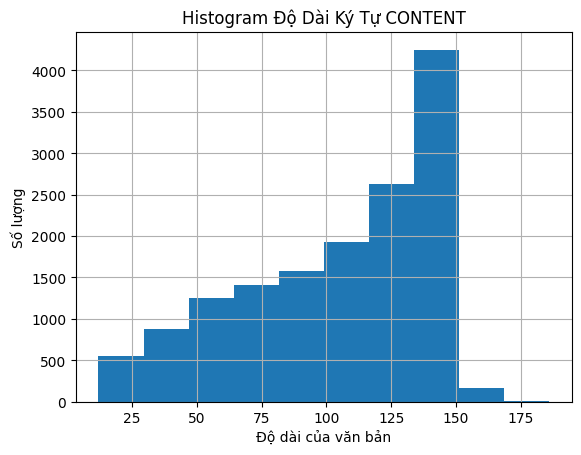

In [ ]:
import matplotlib.pyplot as plt
# Theo độ dài ký tự
df['text'].str.len().hist()
plt.xlabel('Độ dài của văn bản')
plt.ylabel('Số lượng')
plt.title('Histogram Độ Dài Ký Tự CONTENT')
plt.show()

<Axes: >

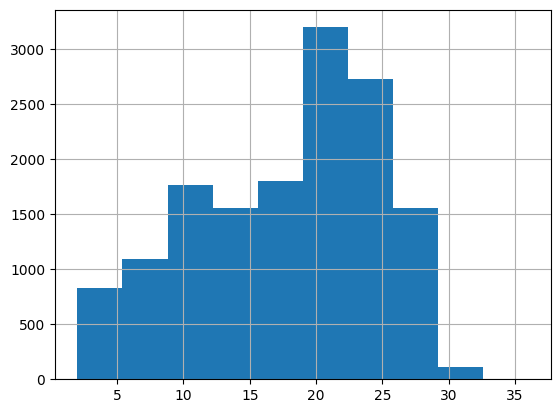

In [ ]:
# Theo số lượng Từ
df['text'].str.split().map(lambda x : len(x)).hist()

## Xử lý dữ liệu

In [ ]:
df.isnull().sum()

airline    0
text       0
dtype: int64

In [ ]:
df.columns

Index(['airline', 'text'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   airline  14640 non-null  object
 1   text     14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


## Làm sạch dữ liệu

Xử lý chuỗi (symbol,punctuations)

In [ ]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [ ]:
df['airline']=df['airline'].apply(lambda x: x.split(',,,')[0])

In [ ]:
# Loại bỏ tên các hãng bay khỏi các bình luận trong cột 'text'
def remove_airline_names_from_text(row):
    airline_name = row['airline'].lower().replace(" ", "")
    text = row['text'].lower()
    text = text.replace("@" + airline_name, "")  # Loại bỏ tên hãng bay
    return text

# Áp dụng hàm loại bỏ tên hãng bay cho cột 'text' trong DataFrame
df['text'] = df.apply(remove_airline_names_from_text, axis=1)

In [ ]:
for index,text in enumerate(df['text'][35:40]):
  print('Comment %d:\n'%(index+1),text)

Comment 1:
 nice rt : vibe with the moodlight from takeoff to touchdown. #moodlitmonday #sciencebehindtheexperience http://t.co/y7o0unxtqp
Comment 2:
  moodlighting is the only way to fly! best experience ever! cool and calming. 💜✈ #moodlitmonday
Comment 3:
  @freddieawards done and done! best airline around, hands down!
Comment 4:
  when can i book my flight to hawaii??
Comment 5:
  your chat support is not working on your site: http://t.co/vhp2gtdwpk


Xử lý các dạng từ

Expand Contractions

In [ ]:
import re

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['text'] = df['text'].apply(lambda x: expand_contractions(x))

Lowercase the reviews

In [ ]:
df['clean_text']=df['text'].apply(lambda x: x.lower())

Remove digits and words containing digits

In [ ]:
df['clean_text']=df['clean_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

Remove Punctuations

In [ ]:
df['clean_text']=df['clean_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [ ]:
# Removing extra spaces
df['clean_text']=df['clean_text'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
import re

# Tạo biểu thức chính quy để tìm icon Unicode
icon_regex = r'[\U00010000-\U0010FFFF]'

# Hàm để lọc ra tất cả các icon Unicode từ một chuỗi
def find_icons(text):
    return re.findall(icon_regex, text)

# Áp dụng hàm cho cột 'cleaned' trong DataFrame
df['icons'] = df['clean_text'].apply(find_icons)

In [ ]:
df.head()

,airline,text,clean_text,icons
0,Virgin America,what @dhepburn said.,what dhepburn said,[]
1,Virgin America,plus you have added commercials to the experi...,plus you have added commercials to the experi...,[]
2,Virgin America,i did not today... must mean i need to take a...,i did not today must mean i need to take anot...,[]
3,Virgin America,"it is really aggressive to blast obnoxious ""e...",it is really aggressive to blast obnoxious en...,[]
4,Virgin America,and it is a really big bad thing about it,and it is a really big bad thing about it,[]


In [ ]:
# Hàm để loại bỏ các icon Unicode từ một chuỗi
def remove_icons(text):
    return re.sub(icon_regex, '', text)

# Áp dụng hàm loại bỏ icon cho cột 'cleaned' trong DataFrame
df['clean_text'] = df['clean_text'].apply(remove_icons)

In [ ]:
for index,text in enumerate(df['clean_text'][45:60]):
  print('Comment %d:\n'%(index+1),text)

Comment 1:
  im elevategold for a good reason you rock
Comment 2:
  dream httptco httptco
Comment 3:
  wow this just blew my mind
Comment 4:
  ladygaga carrieunderwood after last night tribute soundofmusic ladygaga i think carrieunderwood agree
Comment 5:
  ladygaga carrieunderwood all were entertaining
Comment 6:
  is flight on it is way was supposed to take off minutes ago website still shows on time not in flight thanks
Comment 7:
  ladygaga carrieunderwood julie andrews all the way though ladygaga was very impressive no to carrieunderwood
Comment 8:
  wish you flew out of atlanta soon
Comment 9:
  ladygaga carrieunderwood julie andrews hands down
Comment 10:
  will flights be leaving dallas for la on february 
Comment 11:
  hi im so excited about your lgagtdal deal but ive been trying book since last week amp the page never loads thx
Comment 12:
  you know it need it on my spotify stat guiltypleasures
Comment 13:
  ladygaga carrieunderwood im lady gaga she is amazing 
Comment 14:
 

In [ ]:
df.head()

,airline,text,clean_text,icons
0,Virgin America,what @dhepburn said.,what dhepburn said,[]
1,Virgin America,plus you have added commercials to the experi...,plus you have added commercials to the experi...,[]
2,Virgin America,i did not today... must mean i need to take a...,i did not today must mean i need to take anot...,[]
3,Virgin America,"it is really aggressive to blast obnoxious ""e...",it is really aggressive to blast obnoxious en...,[]
4,Virgin America,and it is a really big bad thing about it,and it is a really big bad thing about it,[]


Xử lý stopword và lemmatization (Document Term Matrix)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Download stopwords và wordnet từ nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Khởi tạo WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# Khởi tạo CountVectorizer để tạo Document Term Matrix
vectorizer = CountVectorizer()

In [ ]:
# Xây dựng stopword list
stop_words = set(stopwords.words('english'))

In [ ]:
# Hàm xử lý văn bản: loại bỏ stopword và lemmatization
def process_text(text):
    # Tách từ
    tokens = word_tokenize(text)
    # Loại bỏ stopword và lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

In [ ]:
# Áp dụng hàm xử lý văn bản cho trường cleaned
df['cleaned'] = df['clean_text'].apply(process_text)

In [ ]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['clean_text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
df_grouped=df[['airline','lemmatized']].groupby(by='airline').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
airline,
American,air consider continue point program receive pe...
Delta,jetblue yesterday way ewr fll takeoff \n wheel...
Southwest,air wait hit hour air m happy cancel flight fl...
US Airways,well time flight friday need change worried ...
United,thank thank take care mr happy customer ...


In [ ]:
df_cleaned = df.copy()

In [ ]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aa,aaaand,aaadvantage,aaalwayslate,aaba,aacom,aacustomerservice,aadavantage,aadelay,aadfw,...,zipper,zkatcher,zombie,zone,zoom,zrh,zrhairport,zuke,zurich,zurichnew
airline,,,,,,,,,,,,,,,,,,,,,
American,167,0,1,1,0,1,1,1,1,2,...,0,0,0,2,1,0,0,0,1,1
Delta,3,0,0,0,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
Southwest,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


Khám phá dữ liệu

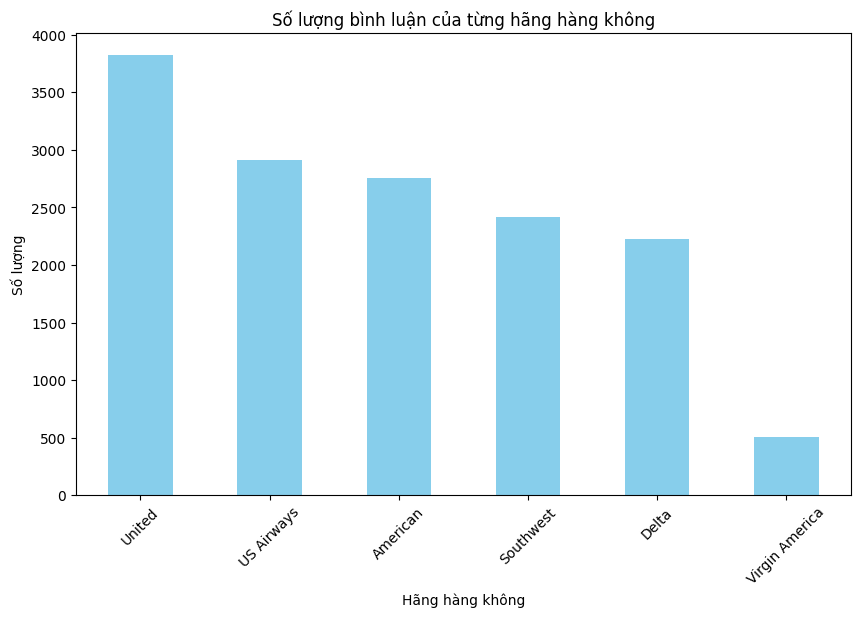

In [ ]:
# Tính tần suất xuất hiện của từng hãng hàng không trong các bình luận
airline_frequency = df['airline'].value_counts()

# Trực quan hóa kết quả
plt.figure(figsize=(10, 6))
airline_frequency.plot(kind='bar', color='skyblue')
plt.title('Số lượng bình luận của từng hãng hàng không')
plt.xlabel('Hãng hàng không')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_cleaned.head()

,airline,text,clean_text,icons,cleaned,lemmatized
0,Virgin America,what @dhepburn said.,what dhepburn said,[],dhepburn said,dhepburn say
1,Virgin America,plus you have added commercials to the experi...,plus you have added commercials to the experi...,[],plus added commercial experience tacky,plus add commercial experience tacky
2,Virgin America,i did not today... must mean i need to take a...,i did not today must mean i need to take anot...,[],today must mean need take another trip,today mean need trip
3,Virgin America,"it is really aggressive to blast obnoxious ""e...",it is really aggressive to blast obnoxious en...,[],really aggressive blast obnoxious entertainmen...,aggressive blast obnoxious entertainment gue...
4,Virgin America,and it is a really big bad thing about it,and it is a really big bad thing about it,[],really big bad thing,big bad thing


In [ ]:
import nltk
# paste this at the start of code
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from collections import Counter

stop=set(stopwords.words('english'))

def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]
    """

    tokens = word_tokenize(column)
    return [w for w in tokens if w.isalpha()]


# df_cleaned['cleaned_token'] = df_cleaned['cl'].apply(word_tokenize)
df_cleaned['cleaned_token'] = df_cleaned.apply(lambda x: tokenize(x['cleaned']), axis=1)
df_cleaned.head()

,airline,text,clean_text,icons,cleaned,lemmatized,cleaned_token
0,Virgin America,what @dhepburn said.,what dhepburn said,[],dhepburn said,dhepburn say,"[dhepburn, said]"
1,Virgin America,plus you have added commercials to the experi...,plus you have added commercials to the experi...,[],plus added commercial experience tacky,plus add commercial experience tacky,"[plus, added, commercial, experience, tacky]"
2,Virgin America,i did not today... must mean i need to take a...,i did not today must mean i need to take anot...,[],today must mean need take another trip,today mean need trip,"[today, must, mean, need, take, another, trip]"
3,Virgin America,"it is really aggressive to blast obnoxious ""e...",it is really aggressive to blast obnoxious en...,[],really aggressive blast obnoxious entertainmen...,aggressive blast obnoxious entertainment gue...,"[really, aggressive, blast, obnoxious, enterta..."
4,Virgin America,and it is a really big bad thing about it,and it is a really big bad thing about it,[],really big bad thing,big bad thing,"[really, big, bad, thing]"


In [ ]:
def extract_ngrams(tokenized_data,n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    ngrams_str = [' '.join(grams) for grams in ngrams_list]
    return ngrams_str

df_cleaned['cleaned_token'] = df_cleaned['cleaned_token'].apply(lambda x: extract_ngrams(x, 2))
df_cleaned.head()

,airline,text,clean_text,icons,cleaned,lemmatized,cleaned_token
0,Virgin America,what @dhepburn said.,what dhepburn said,[],dhepburn said,dhepburn say,[dhepburn said]
1,Virgin America,plus you have added commercials to the experi...,plus you have added commercials to the experi...,[],plus added commercial experience tacky,plus add commercial experience tacky,"[plus added, added commercial, commercial expe..."
2,Virgin America,i did not today... must mean i need to take a...,i did not today must mean i need to take anot...,[],today must mean need take another trip,today mean need trip,"[today must, must mean, mean need, need take, ..."
3,Virgin America,"it is really aggressive to blast obnoxious ""e...",it is really aggressive to blast obnoxious en...,[],really aggressive blast obnoxious entertainmen...,aggressive blast obnoxious entertainment gue...,"[really aggressive, aggressive blast, blast ob..."
4,Virgin America,and it is a really big bad thing about it,and it is a really big bad thing about it,[],really big bad thing,big bad thing,"[really big, big bad, bad thing]"


In [ ]:
def combine_words(word_list):
    all_words = []
    for word in word_list: all_words += word
    return all_words

def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending =False)
    word_count_sorted
    return word_count_sorted[:10]

reviews = df_cleaned['cleaned_token']
reviews_words = combine_words(reviews)
reviews_words[:10]

['dhepburn said',
 'plus added',
 'added commercial',
 'commercial experience',
 'experience tacky',
 'today must',
 'must mean',
 'mean need',
 'need take',
 'take another']

In [ ]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head(10)

,words,word_count
470,customer service,564
611,cancelled flightled,498
549,late flight,245
884,flight cancelled,239
21852,air flight,219
1108,cancelled flighted,219
27746,air thanks,190
552,cancelled flight,159
3441,late flightr,154
214,booking problem,149


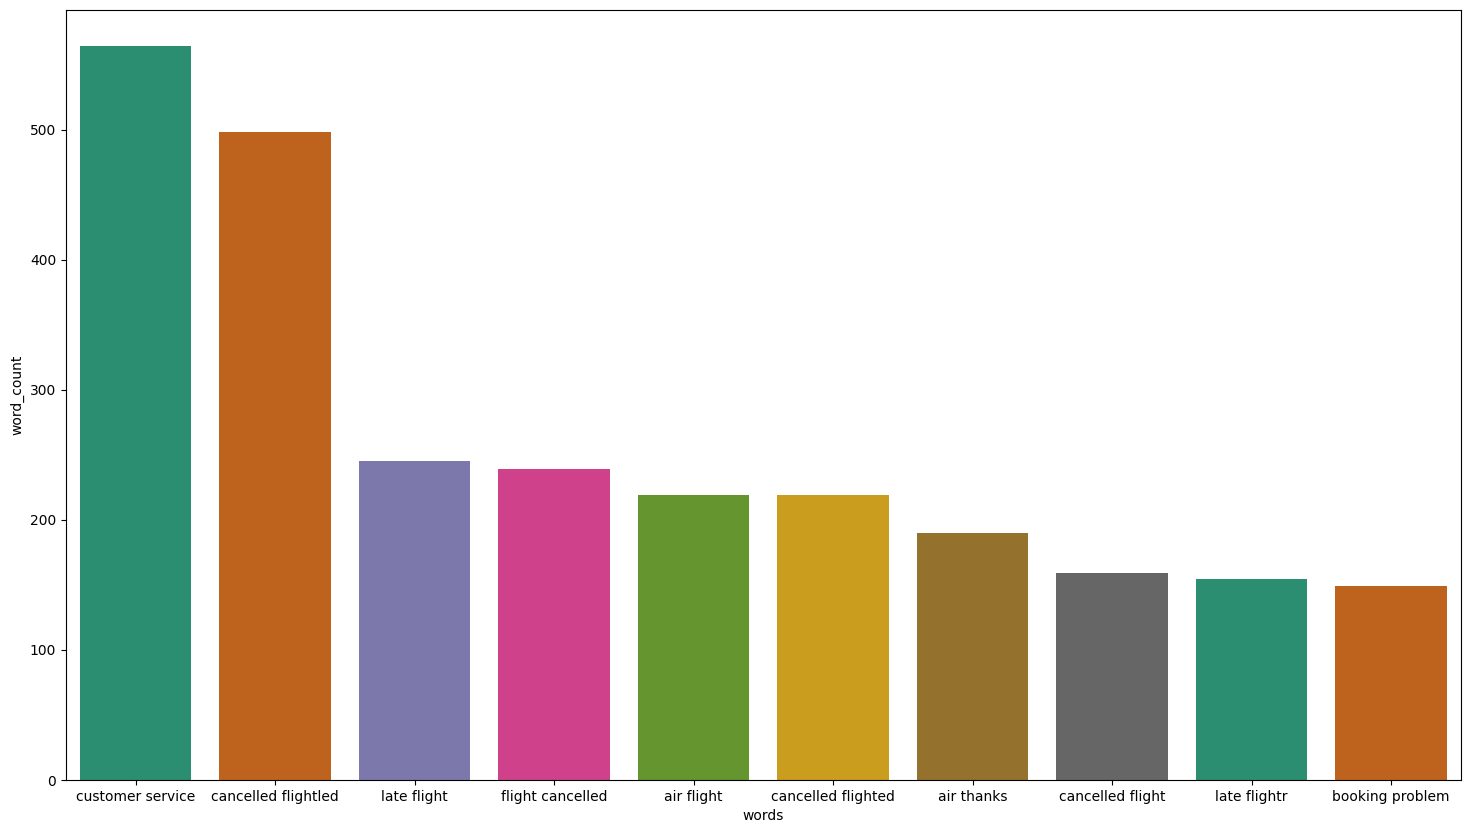

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
sns.barplot(data=reviews_topword_count, x=reviews_topword_count['words'], y=reviews_topword_count['word_count'], palette='Dark2')
plt.show()

In [ ]:
# Chọn một số từ/cụm từ quan trọng
important_words = ['customer service', 'cancelled flightled', 'late flight', 'flight cancelled']

# Trích xuất mẫu văn bản chứa các từ/cụm từ đã chọn
sample_texts = []
for word in important_words:
    sample_text = df_cleaned[df_cleaned['cleaned'].str.contains(word)]['cleaned'].sample(5, random_state=42).values
    sample_texts.extend(sample_text)

# Hiển thị các mẫu văn bản
for i, text in enumerate(sample_texts, start=1):
    print(f"Sample {i}: {text}\n")

Sample 1: air followed dmd please respond concern really disappointed customer service

Sample 2: air trying reach american airline since last evening cancelled flight flight worst customer service ever

Sample 3: air poor customer service problem

Sample 4: air customer service inferior nationalized third world nation airline get together

Sample 5: air group minor child broken group still miami delta much better customer service

Sample 6: air offered cot sleep onafter cancelled flightled flight fucking cot hotel like supposed provide

Sample 7: last minute flight deal cute little frequentflyer friday flight cancelled flightled

Sample 8: air two cancelled flightled lga flight delta took look like new carrier delta

Sample 9: air hold min trying rebook flight cancelled flightled help

Sample 10: air tell cancelled flightled flight v delay

Sample 11: worst flying experience life flight scheduled departure phl hr late flightr guess

Sample 12: flight aircraft gate crew hour late fligh

In [ ]:
# Phân tích ngữ cảnh sử dụng của các từ/cụm từ quan trọng
for i, text in enumerate(sample_texts, start=1):
    print(f"Sample {i}: {text}\n")
    for word in important_words:
        if word in text:
            print(f"Word/Phrase: {word}")
            print("Context:")
            context = text.replace(word, f"\033[1m{word}\033[0m")
            print(context)
            print("\n")

Sample 1: air followed dmd please respond concern really disappointed customer service

Word/Phrase: customer service
Context:
air followed dmd please respond concern really disappointed customer service


Sample 2: air trying reach american airline since last evening cancelled flight flight worst customer service ever

Word/Phrase: customer service
Context:
air trying reach american airline since last evening cancelled flight flight worst customer service ever


Sample 3: air poor customer service problem

Word/Phrase: customer service
Context:
air poor customer service problem


Sample 4: air customer service inferior nationalized third world nation airline get together

Word/Phrase: customer service
Context:
air customer service inferior nationalized third world nation airline get together


Sample 5: air group minor child broken group still miami delta much better customer service

Word/Phrase: customer service
Context:
air group minor child broken group still miami delta much bett

Dựa vào các ngữ cảnh này, chúng ta có thể rút ra một số nhận xét và suy luận về ý nghĩa của từng từ/cụm từ trong ngữ cảnh của dữ liệu:

* Customer Service (Dịch vụ khách hàng):Cụm từ "customer service" thường được sử dụng để phê phán hoặc diễn đạt sự thất vọng đối với chất lượng dịch vụ khách hàng của các hãng hàng không.Các mẫu văn bản cho thấy rằng nhiều khách hàng đã gặp phải vấn đề với dịch vụ khách hàng và thể hiện sự thất vọng về điều này.

* Cancelled Flight (Chuyến bay bị hủy):
Cụm từ "cancelled flight" thường xuất hiện kèm theo cảm xúc không hài lòng hoặc tức giận, đặc biệt khi gặp phải sự cố về chuyến bay bị hủy.
Các mẫu văn bản cũng cho thấy sự lo ngại và bất mãn đối với việc quản lý các tình huống này từ phía hãng hàng không.

* Late Flight (Chuyến bay trễ):
Cụm từ "late flight" thường được sử dụng để chỉ sự không hài lòng khi gặp phải tình trạng chuyến bay trễ.
Có thể thấy rằng các khách hàng phản ánh sự bất mãn khi phải chờ đợi hoặc gặp phải sự chậm trễ từ phía hãng hàng không.

In [ ]:
# Phân tách dữ liệu theo từng hãng hàng không
df_airline_groups = df_cleaned.groupby('airline')

# Phân tích ý nghĩa của các từ/cụm từ quan trọng trong từng nhóm hãng hàng không
for airline, group_data in df_airline_groups:
    print(f"Airline: {airline}")
    reviews = group_data['cleaned_token']
    reviews_words = combine_words(reviews)
    reviews_topword_count = count_topwords(reviews_words)
    print(reviews_topword_count.head(10))
    print("\n")

Airline: American
                    words  word_count
114   cancelled flightled         162
161            air flight         127
11       customer service         111
16             air thanks         102
66       flight cancelled          76
67     cancelled flighted          68
140             air thank          56
3133            call back          53
306      cancelled flight          51
56            late flight          42


Airline: Delta
                words  word_count
398       fleet fleek         146
397     jetblue fleet         145
399     fleek httptco         121
200    jetblue thanks          97
15     jetblue flight          84
111     jetblue thank          58
876        rt jetblue          57
414  customer service          46
339     jetblue would          31
232        jetblue im          30


Airline: Southwest
                    words  word_count
752   cancelled flightled         111
88             air flight          90
579      customer service          90
